In [ ]:

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install required libraries (if not already installed)
!pip install -q scikit-learn pandas matplotlib seaborn joblib
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 105.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import gradio as gr

In [ ]:
# Path to the cleaned dataset in Google Drive
DATA_DIR = '/content/drive/MyDrive/ismail/'
DATA_PATH = os.path.join(DATA_DIR, 'Dataset.csv')


In [ ]:
# Step 1: Load the dataset
data = pd.read_csv(DATA_PATH)
print("Dataset Loaded Successfully!")
print(data.head())

Dataset Loaded Successfully!
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, M

In [ ]:
print(data.columns)


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [ ]:
print("Dataset Columns:", data.columns.tolist())


Dataset Columns: ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']


In [ ]:
# Step 2: Preprocessing
# Drop rows with missing values
data = data.dropna()

# Simplify 'Cuisines' by taking the first cuisine type listed
data['Cuisines'] = data['Cuisines'].str.split(',').str[0]

# Use "Aggregate rating" as the target column for ratings
if 'Aggregate rating' not in data.columns:
    raise ValueError("The dataset does not contain an 'Aggregate rating' column.")

# Filter out rows with non-numeric or invalid ratings
data = data[data['Aggregate rating'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
data['Aggregate rating'] = data['Aggregate rating'].astype(float)

# Feature and target selection
features = ['Restaurant Name', 'Cuisines', 'Votes', 'Average Cost for two']
data = data[features + ['Aggregate rating']]

# Fill missing or invalid numeric values with the median
for col in ['Votes', 'Average Cost for two']:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    data[col] = data[col].fillna(data[col].median())

# Encode categorical variables
data = pd.get_dummies(data, columns=['Cuisines', 'Restaurant Name'], drop_first=True)

# Input (X) and Target (y)
X = data.drop(columns=['Aggregate rating'])
y = data['Aggregate rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training Set Size: {X_train.shape[0]}")
print(f"Testing Set Size: {X_test.shape[0]}")

Training Set Size: 7640
Testing Set Size: 1911


In [ ]:
# Step 3: Model Training
clf = RandomForestRegressor(n_estimators=200, random_state=42)
print("\nTraining the model...")
clf.fit(X_train, y_train)
print("Model training completed!")


Training the model...
Model training completed!


In [ ]:
# Step 3.1: Evaluate the model on training data
print("\nEvaluating the model on the training data...")
y_train_pred = clf.predict(X_train)
training_mse = mean_squared_error(y_train, y_train_pred)
training_r2 = r2_score(y_train, y_train_pred)
print(f"Training Mean Squared Error: {training_mse:.2f}")
print(f"Training R-squared: {training_r2:.2f}")


Evaluating the model on the training data...
Training Mean Squared Error: 0.02
Training R-squared: 0.99


In [ ]:
# Step 3.2: Detailed predictions on training data
print("\nSample Training Data Predictions:")
train_eval_df = pd.DataFrame({
    "True Rating": y_train.values,
    "Predicted Rating": y_train_pred
})
train_eval_df["Correctness"] = np.where(
    abs(train_eval_df["True Rating"] - train_eval_df["Predicted Rating"]) < 0.5, "Correct", "Wrong"
)

print(train_eval_df.head(10))


Sample Training Data Predictions:
   True Rating  Predicted Rating Correctness
0          3.3            3.3620     Correct
1          3.0            2.9875     Correct
2          0.0            0.0000     Correct
3          0.0            0.0000     Correct
4          2.5            2.8075     Correct
5          0.0            0.0000     Correct
6          3.6            3.6005     Correct
7          4.5            4.5790     Correct
8          3.4            3.3420     Correct
9          3.6            3.4250     Correct


In [ ]:
# Summary of training data evaluation
total_samples = len(y_train)
correct_predictions = train_eval_df[train_eval_df["Correctness"] == "Correct"].shape[0]
wrong_predictions = total_samples - correct_predictions
training_accuracy = (correct_predictions / total_samples) * 100
print("\nSummary of Training Data Evaluation:")
print(f"Total Samples: {total_samples}")
print(f"Correct Predictions: {correct_predictions}")
print(f"Wrong Predictions: {wrong_predictions}")
print(f"Training Accuracy (within 0.5 range): {training_accuracy:.2f}%")


Summary of Training Data Evaluation:
Total Samples: 7640
Correct Predictions: 7610
Wrong Predictions: 30
Training Accuracy (within 0.5 range): 99.61%


In [ ]:
# Step 4: Save the trained model
model_path = os.path.join(DATA_DIR, 'rating_predictor.joblib')
joblib.dump(clf, model_path)
print(f"Model saved to: {model_path}")

Model saved to: /content/drive/MyDrive/ismail/rating_predictor.joblib



Validation Results:
Testing Mean Squared Error: 0.11
Testing R-squared: 0.95


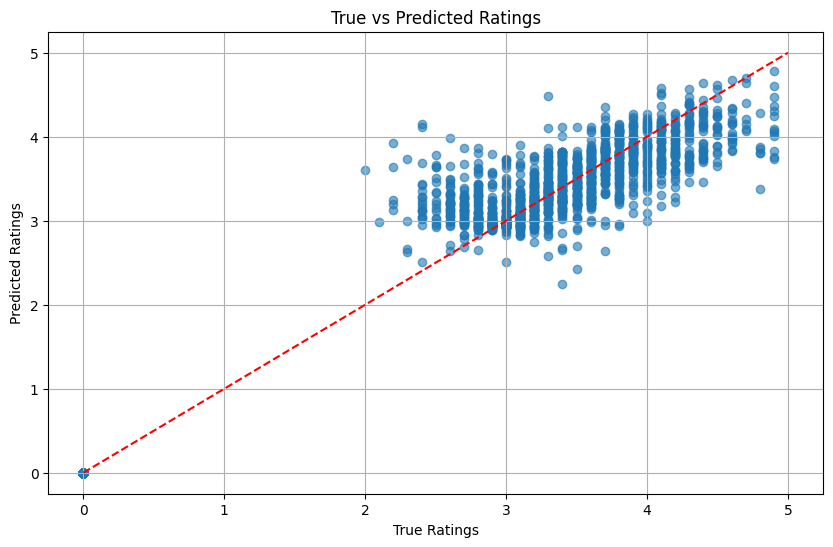

In [ ]:
# Step 5: Model Validation
y_test_pred = clf.predict(X_test)
testing_mse = mean_squared_error(y_test, y_test_pred)
testing_r2 = r2_score(y_test, y_test_pred)
print("\nValidation Results:")
print(f"Testing Mean Squared Error: {testing_mse:.2f}")
print(f"Testing R-squared: {testing_r2:.2f}")
# Visualization: True vs. Predicted Ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([0, 5], [0, 5], 'r--')  # Line of perfect prediction
plt.title("True vs Predicted Ratings")
plt.xlabel("True Ratings")
plt.ylabel("Predicted Ratings")
plt.grid()
plt.show()

In [ ]:
# Launch Gradio App
interface = gr.Interface(
    fn=predict_rating,
    inputs=[
        gr.Textbox(label="Restaurant Name"),
        gr.Number(label="Votes"),
        gr.Number(label="Average Cost for two"),
        gr.Textbox(label="Cuisine")
    ],
    outputs=gr.Textbox(label="Predicted Rating"),
    title="Restaurant Rating Predictor",
    description="Predict the aggregate rating of a restaurant based on its features.",
    live=True
)

In [ ]:
# Step 6: Gradio Interface for Prediction
def predict_rating(restaurant_name, votes, avg_cost, cuisine):
    """
    Predict the rating of a restaurant based on inputs.
    """
    input_data = pd.DataFrame({
        "Votes": [votes],
        "Average Cost for two": [avg_cost],
        "Cuisines_" + cuisine: [1],
        "Restaurant Name_" + restaurant_name: [1]
    })

    # Fill missing columns with 0 (to handle unseen restaurants/cuisines)
    for col in X.columns:
        if col not in input_data.columns:
            input_data[col] = 0

    prediction = clf.predict(input_data)
    return f"Predicted Aggregate Rating: {prediction[0]:.2f}"

In [ ]:
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1db31510328cf42bfb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
